In [1]:
#Import the packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix

# Diabetes data analysis

In [2]:
#Read the diabetes.csv file.
data = pd.read_csv("data/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
m,n = data.shape
print("There are {} rows representing instances of female patients who are at least 21 years of age of Pima Indian heritage from the Pima Indians tribe".format(m))
print("There are {} columns representing the measure attributes".format(n))

There are 768 rows representing instances of female patients who are at least 21 years of age of Pima Indian heritage from the Pima Indians tribe
There are 9 columns representing the measure attributes


In [4]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Are there missing values in the columns? :
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
There aren't missing values in the DataFrame


Text(0.5, 1.0, 'Missing values plot (In white missing values)')

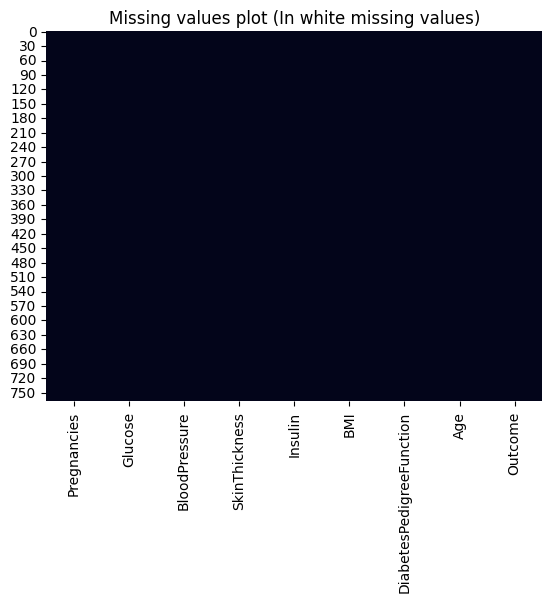

In [5]:
# data_empty_mask is a Dataframe with same size as the original which is true in the position (i,j) is missing and false for everything else.
data_empty_mask = data.apply(lambda x: pd.isnull(x) | pd.isna(x) ,axis=1)
print("Are there missing values in the columns? :")
print(data_empty_mask.any())
if (data_empty_mask.any()).any():
    print("Distribution of missing values in the DataFrame:")
    print(data_empty_mask.value_counts())
else:
    print("There aren't missing values in the DataFrame")
ax = sns.heatmap(data_empty_mask, cbar=False)
ax.set_title("Missing values plot (In white missing values)")

There aren't missing values in the DataFrame

In [6]:
print(data.drop(columns=["Outcome"]).describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

<Axes: >

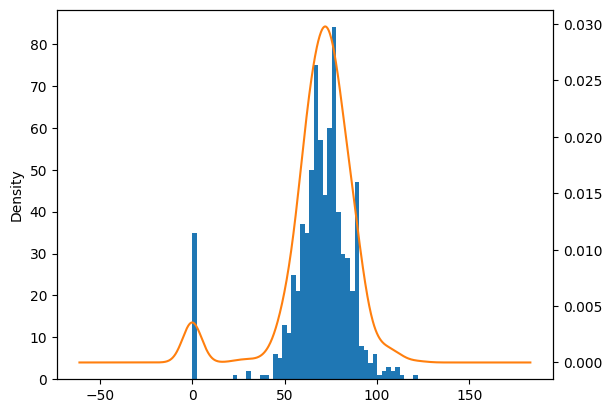

In [7]:
NBIN = 50
ax = data.BloodPressure.plot.hist(bins = NBIN)
data.BloodPressure.plot.kde(secondary_y=True)

<strong>Observations: </strong>
<ol>
<li> There are about 40 records equal to 0, which is a strangeous value for blood pressure measurements. One possible cause is a preprocessing in the dataframe where the missing values were filled with 0.
<li> The distribution has the shape of a bimodal distribution, if the 0 values are excluded, then the distribution will have the shape of a normal distribution. It is important to understand the reason of the zero values.
<li> As the distribution has a considerable number of zeros, the median is a better measure of central tendency than the mean.
<li> The interquartile range is  (80-62) = 18, which it means that 50% of the data is in 18 units between 62 and 80
</ol>


In [8]:
bmi_value = data.loc[(data["Glucose"] == data["Glucose"].max()), "BMI"].values
print("The BMI value for the person having the highest Glucose is {}".format(bmi_value[0]))

The BMI value for the person having the highest Glucose is 42.9


In [9]:
print("--------The mean is:")
print(data.mean())
print("--------The median is:")
print(data.median())
print("--------The mode is:")
print(data.mode().iloc[0,:])

--------The mean is:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
--------The median is:
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
--------The mode is:
Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPed

When the mean and the median are very different, the function is tailed to one of its sides (as the case of insulin)

<Axes: >

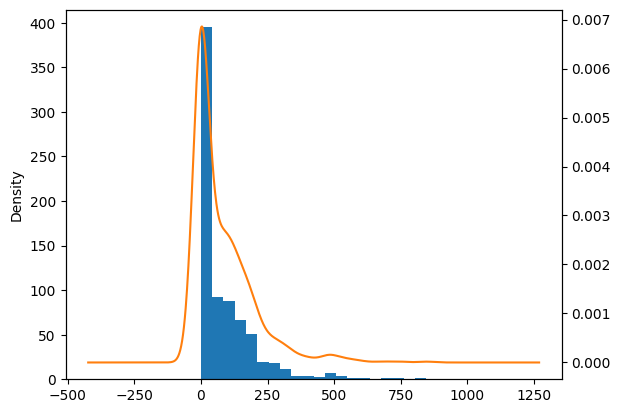

In [10]:
NBIN = 20
ax = data.Insulin.plot.hist(bins = NBIN)
data.Insulin.plot.kde(secondary_y=True)

In [11]:
num_women = data.loc[(data["Glucose"] > data["Glucose"].mean()), "Glucose"].count()
print("There are {} women with a level of Glucose above the mean, which represent the {:.2f}% of the sample".format(num_women, 100*num_women/m))

There are 349 women with a level of Glucose above the mean, which represent the 45.44% of the sample


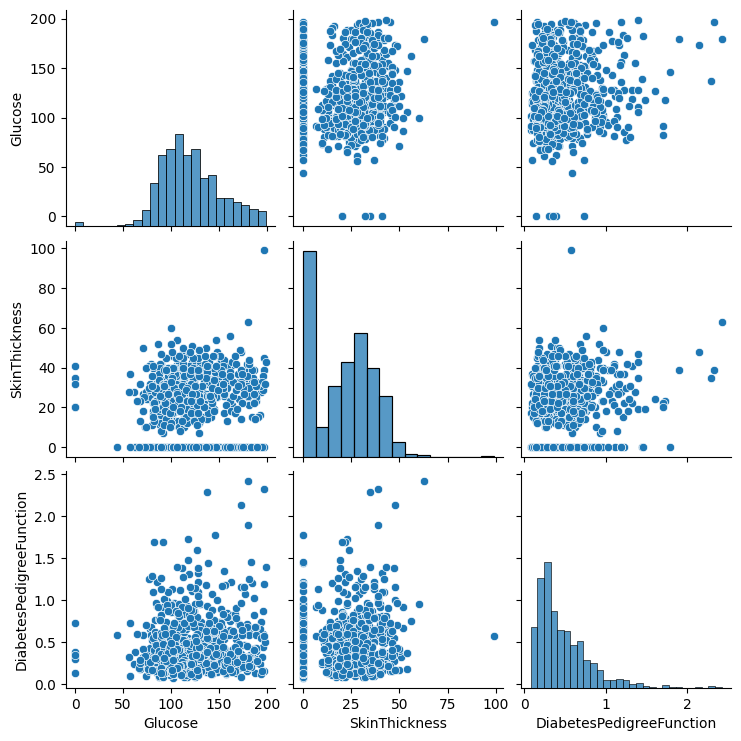

In [12]:
sns.pairplot(data[['Glucose','SkinThickness','DiabetesPedigreeFunction']])

<strong>Observations: </strong>
<ol>
<li>The SkinThickness attribute has a considerable number of zero values, which can be the consequence of filling in the missing values with a zero.
<li>Glucose is in the shape of a normal distribution, SkinThickness is in the shape of a bimodal distribution and DiabetesPedigreeFunction is in the shape of a left-tailed distribution.
<li>SkinThickness and glucose are not correlated: There is no linear relation between Glucose and SkinThickness attributes.
<li>SkinThickness and DiabetesPedigreeFunction are not correlated: There is no linear relation between DiabetesPedigreeFunction and SkinThickness attributes.
<li>Glucose and DiabetesPedigreeFunction have a positive correlation, a linear relation with a positive slope can be identified.
</ol>

<Axes: xlabel='Glucose', ylabel='Insulin'>

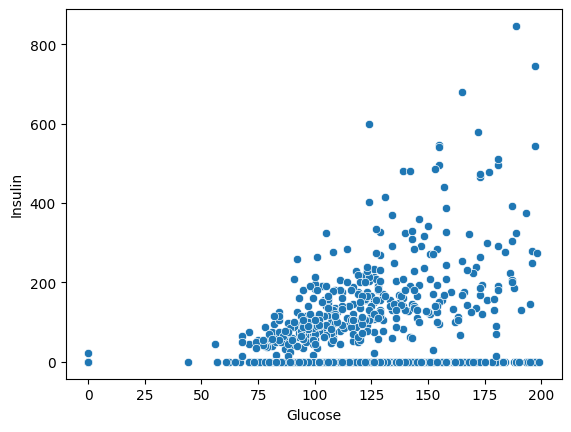

In [13]:
sns.scatterplot(data=data, x="Glucose", y="Insulin")

<strong>Observations: </strong>
<ol>
<li>Insulin and glucose have a positive correlation, if the glucose value is high, then the insulin value is also high.
<li>Insulin has a considerable set of values equal to 0
</ol>

<Axes: xlabel='Age', ylabel='Count'>

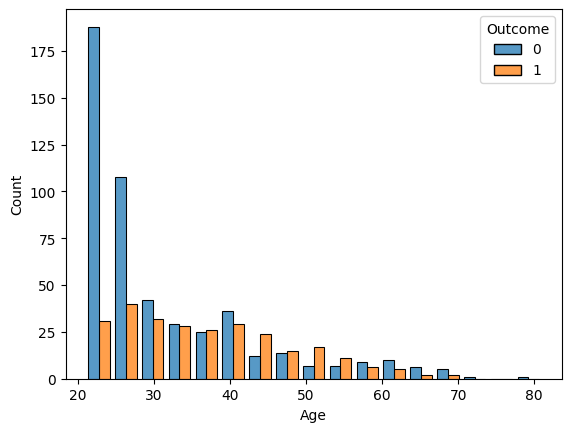

In [14]:
sns.histplot(data=data, x="Age", hue="Outcome", multiple="dodge", shrink=.8)

<strong>Observations: </strong>
<ol>
<li>In the data, there are a greater number of non-diabetic women than diabetic women in the 18-30 years age range.
<li> After the age of 30, both distribution are similar, so in this age range we obtain a similar count of non-diabetic women and diabetic women by age group.
</ol>

In [15]:
iqr_range = data.quantile(0.75) - data.quantile(0.25)
print("The IQR is:")
print(iqr_range)

The IQR is:
Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


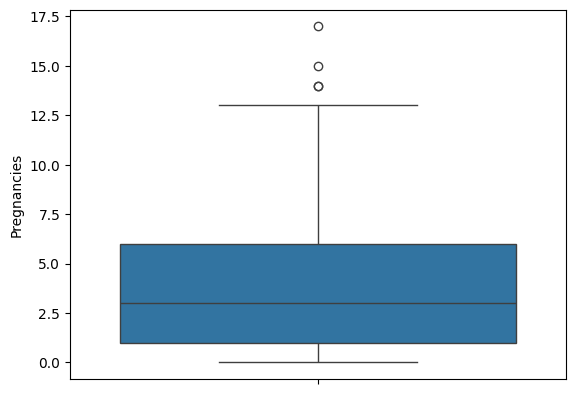

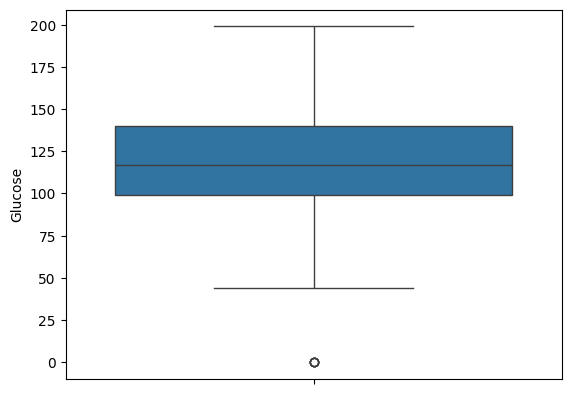

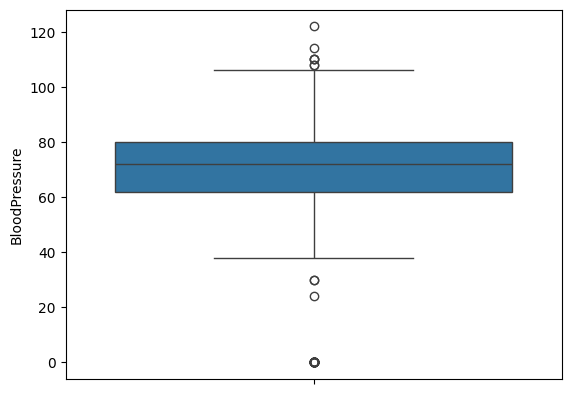

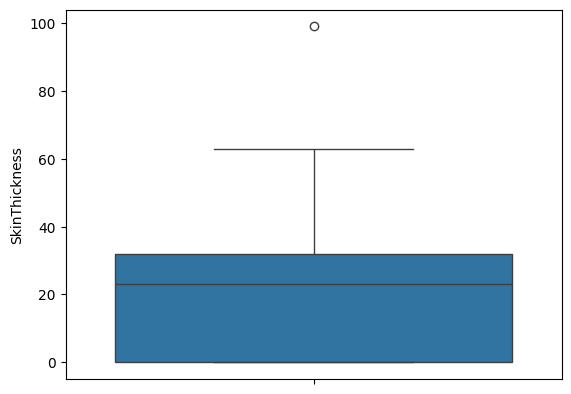

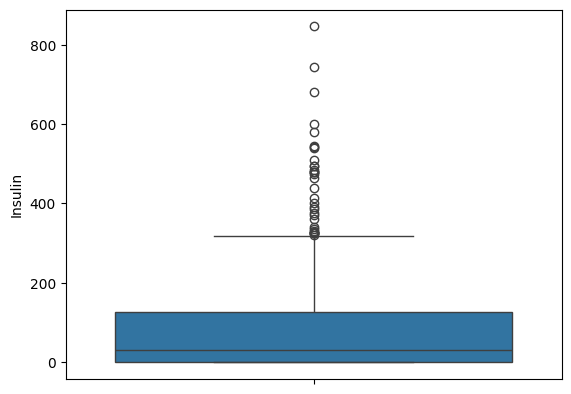

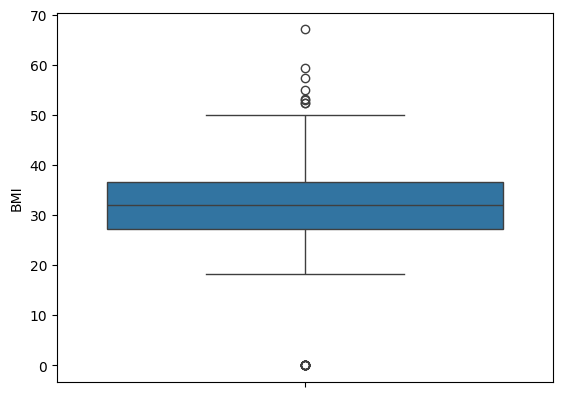

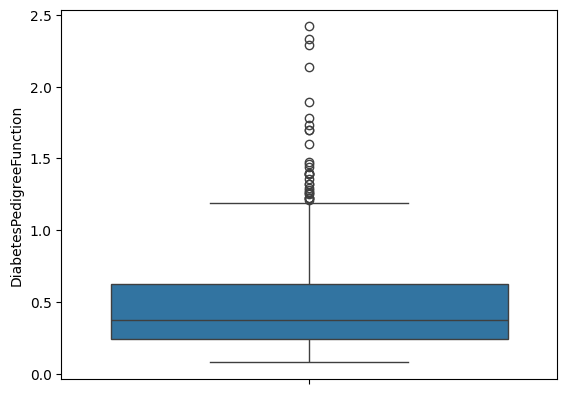

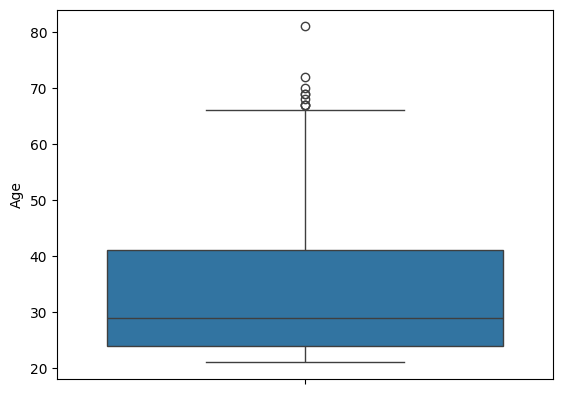

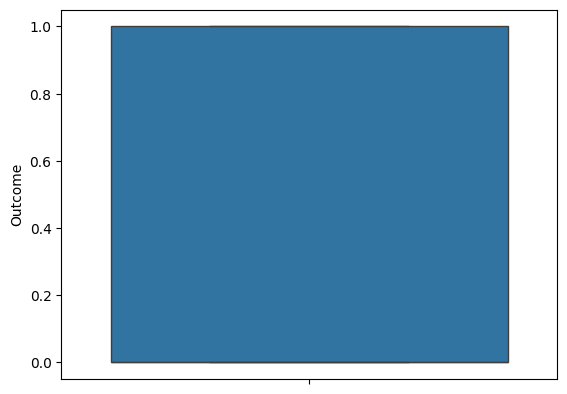

In [16]:
for col in data.columns:
    plt.figure()
    fig = sns.boxplot(y = data[col], showfliers = True)

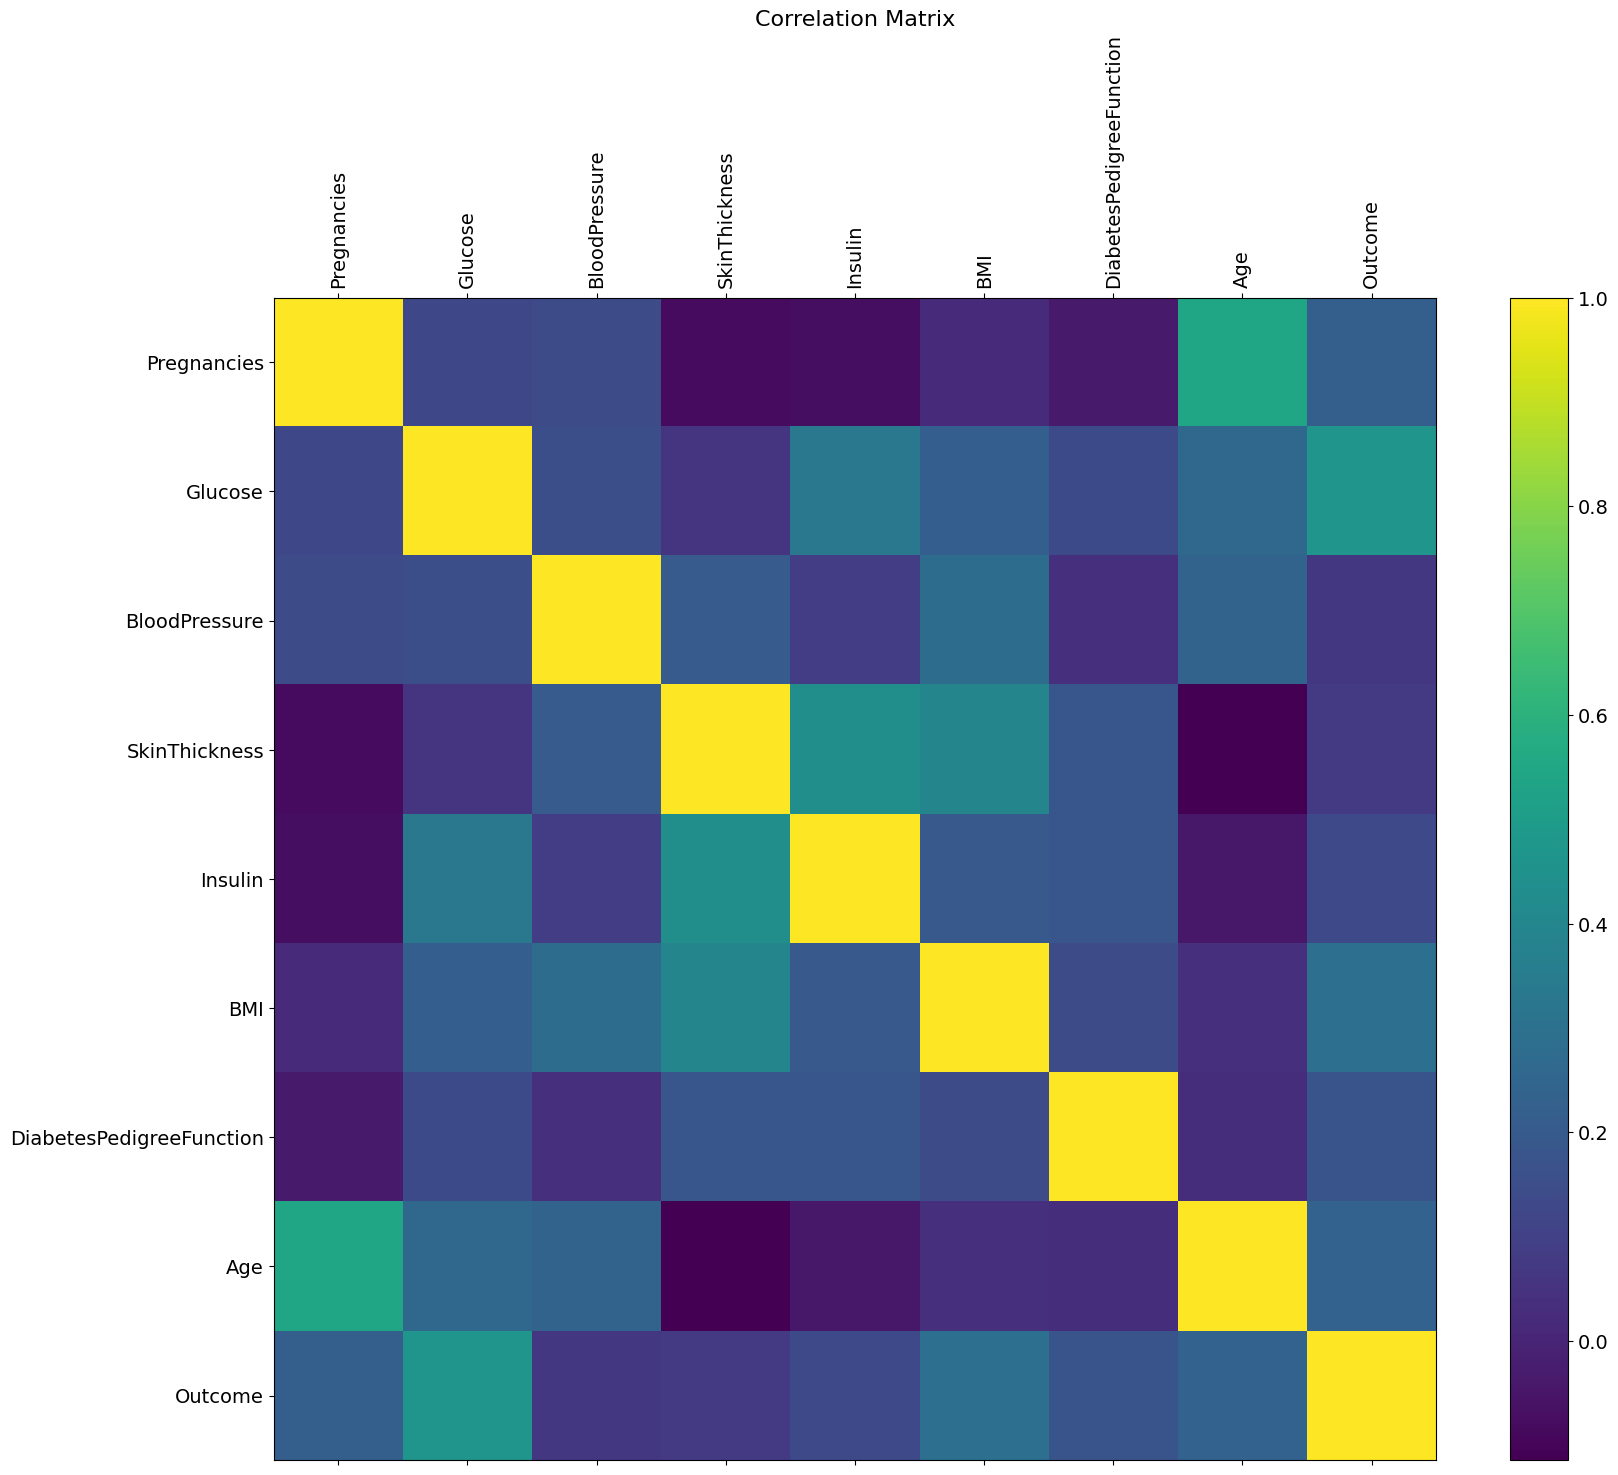

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<strong>Observations: </strong>
<ol>
<li>The outcome is highly correlated with the glucose and BMI attributes.
<li>The outcome has a mid-level correlation with the Age and pregnancies attributes.
<li>Glucose and insulin have a high correlation.
<li>SkinThickness, Insulin and BMI are highly correlated.
<li>Age and pregnancies are highly correlated.
</ol>

 With the current information and as the output is binary, we can start modeling using a logistic regression model. From the correlation analysis we can identify that a small set of attributes is highly correlated with the output, with the logistic regression model we can identify the importance of these attributes in the classification task. After this, we can do some experiments using decision trees and support vector machines that achieved good results on a set of wasted classification problems in the state of the art

# Modeling

In this section, we want to identify the relationship between the given attributes and the output indicator.

1. Let's understand the attributes distribution throught the output target.

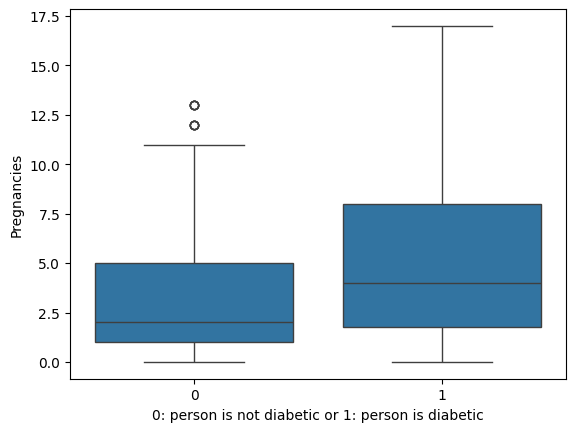

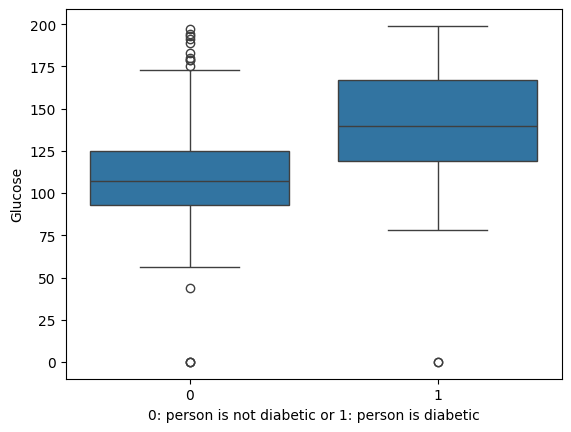

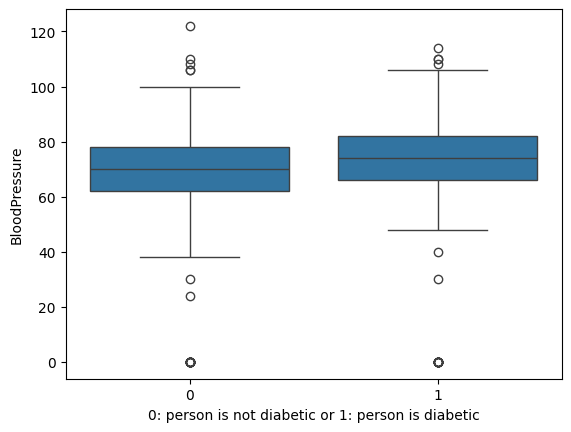

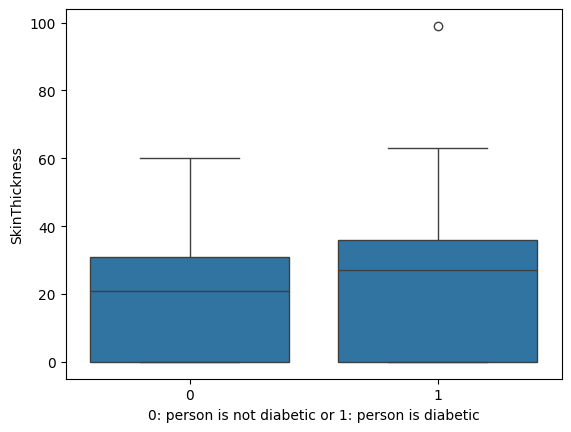

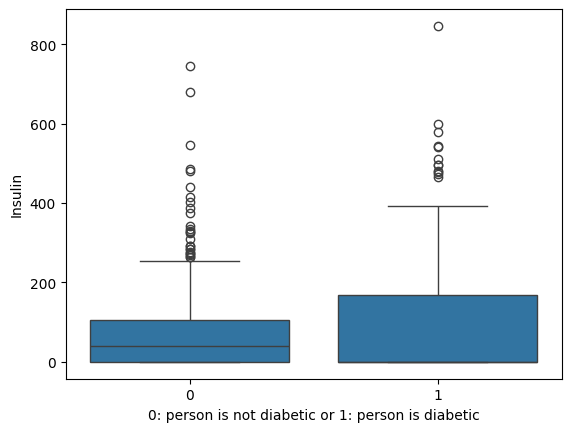

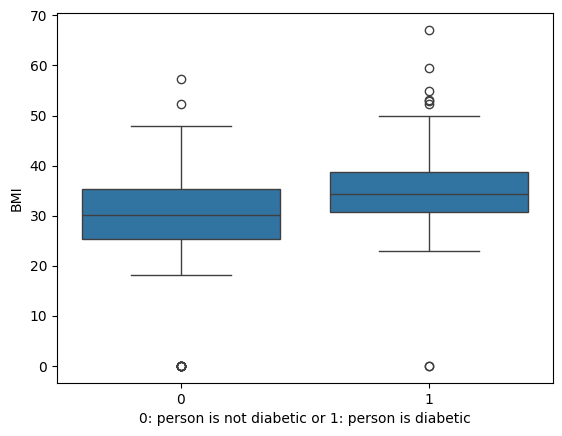

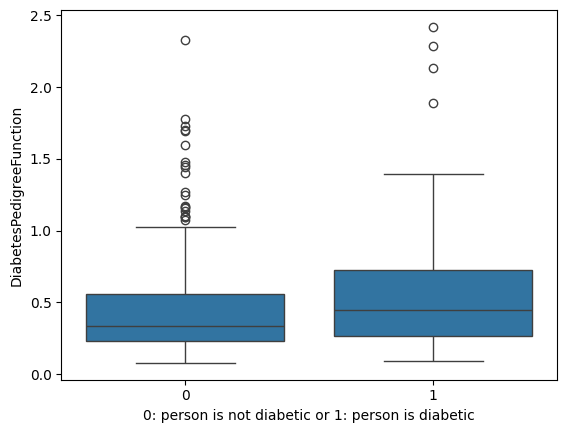

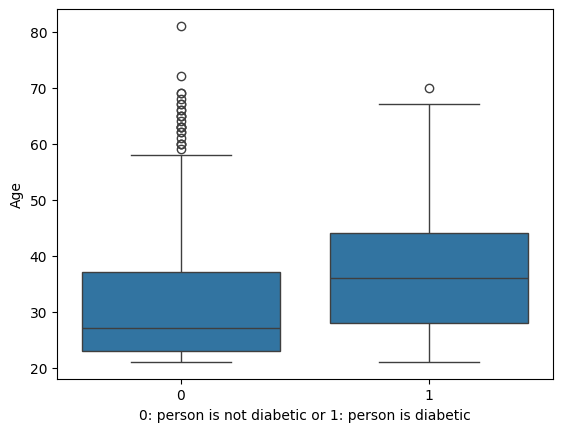

In [18]:
for col in data.drop(columns=["Outcome"]).columns:
    plt.figure()
    fig = sns.boxplot(x = data.Outcome, y = data[col], showfliers = True)
    fig.set_xlabel('0: person is not diabetic or 1: person is diabetic')

<strong>Observations: </strong>
<ol>
<la>Pregnancies, glucose, BMI, and age show different data distributions across outcome class. This indicates that these columns can perform well in the classification task.
</ol>

2. Next, we can sort the correlation values of the output.

In [19]:
print((data.corr()["Outcome"]).sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


3. A scatter plot can help us to understand the behavior of two attributes when they are combined in the classification task.

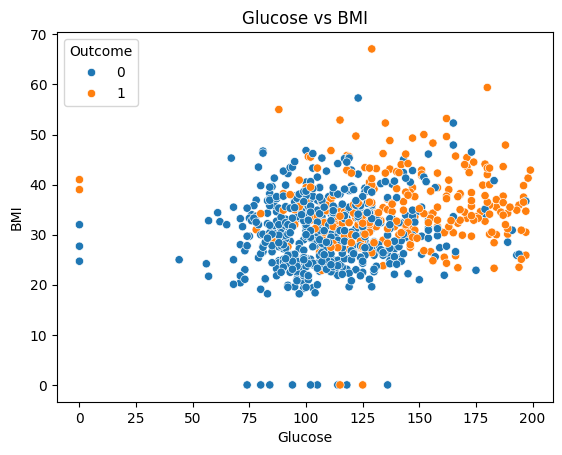

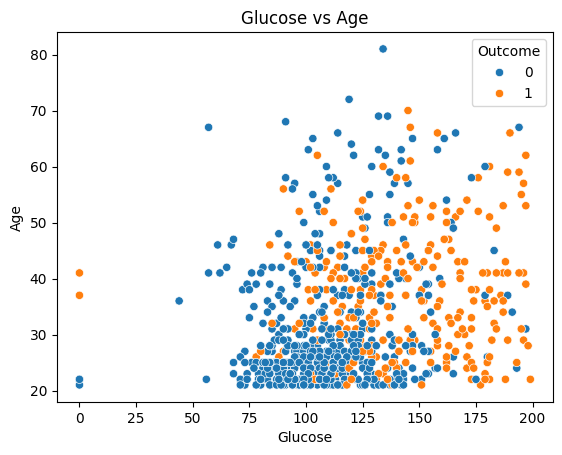

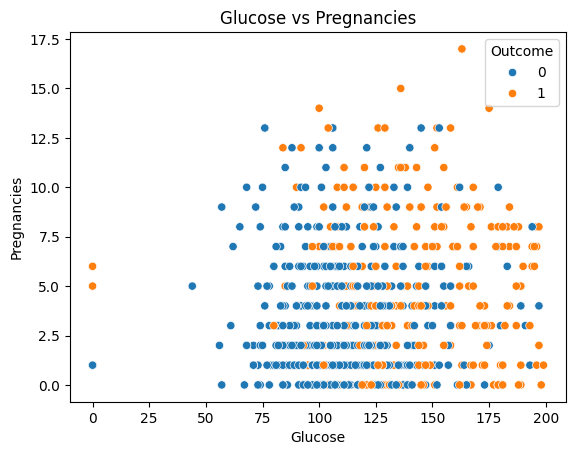

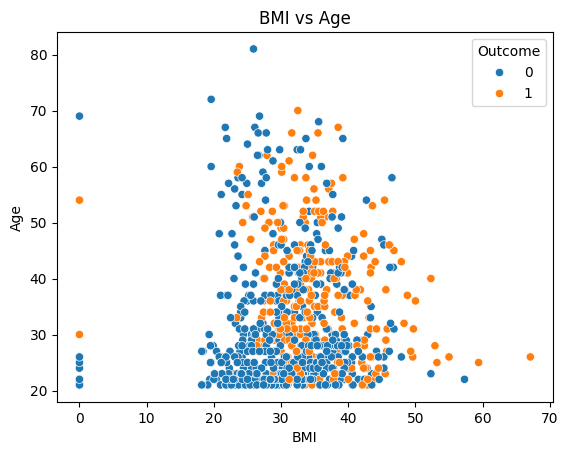

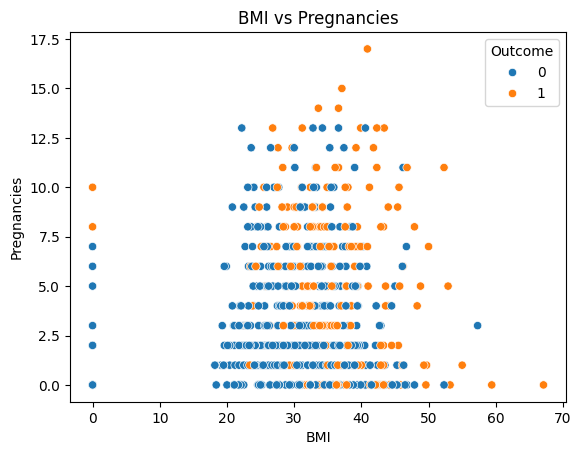

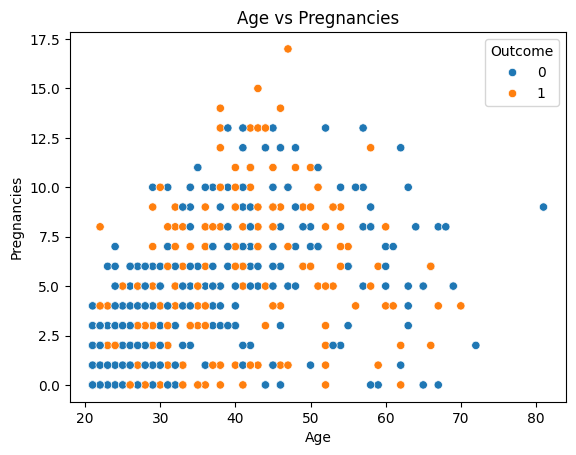

In [20]:
col_high_correlation = ["Glucose","BMI","Age","Pregnancies"]
for col_id1 in range(len(col_high_correlation)):
    for col_id2 in range(col_id1+1,len(col_high_correlation)):
        plt.figure()
        fig = sns.scatterplot(data=data, x=col_high_correlation[col_id1], y=col_high_correlation[col_id2], hue="Outcome")
        fig.set_title("{} vs {}".format(col_high_correlation[col_id1],col_high_correlation[col_id2]))

<strong>Observations: </strong>
<ol>
<li> Glucose and BMI are a good set for the classification task, the area of both labels is easily differentiable, and the decision boundary can be marked with a line.
<li> Glucose and age and Glucose and pregnancy present regions where both classes are easily separable, but there is an area of intersection where the classification task is difficult.
<li> on the BMI vs. age graph, the area of both labels is easily differentiable, but the boundary does not appear linear.
<li> In BMI vs. Pregnancies and Age vs. Pregnancies, the decision boundary is not easily identified.
</ol> 

4. With the following information we can build some ML models to get the initial metrics for the classification task. First, it is build a class for the training of the models, in the training class is executed a cross validation with 5 folds and the recall is used as evaluation metric.

In [33]:
class MlTraining:
    ''' Training class for the generation of logistic regression, decision tree and SVM models.
    '''

    def __init__(self,x,y,kf):
        '''
        Args:
            -x (np array): Feature matrix (Observations, Features)
            -y (np array): labels
            -kf: kfold object for cross validation
        '''
        self.features = x
        self.labels = y
        self.kf = kf
        self.svm_param = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                    'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                    'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]
        self.logistic_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        self.tree_param = {
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
        return
        

    def param_Search(self,train_index,name):
        ''' Description: Function that makes the hyper param search.
        Args: 
            -train_index: Training set index.
            -name: Name of the ML model (SVM,Logistic or Tree)
        returns:
            -clf.best_params_ (dict): Dictionary with the best parameters.
            -x_train: standarized training feature matrix
            -y_train: labels of training set.
            -Min_Max: Scaler of training set
        '''
        Min_Max = MinMaxScaler()
        x_train = Min_Max.fit_transform(self.features[train_index])
        y_train= self.labels[train_index]
        if name == "SVM":
            clf = GridSearchCV(SVC(), self.svm_param, cv=10,scoring='f1')
        elif name == "Logistic":
            clf = GridSearchCV(LogisticRegression(max_iter = 4000), self.logistic_param, cv=10,scoring='f1')
        elif name == "Tree":
            clf = GridSearchCV(DecisionTreeClassifier(), self.tree_param, cv=10,scoring='f1') 
        clf.fit(x_train, np.ravel(y_train,order='C'))
        print("selected parameters: {}".format(clf.best_params_))
        return clf.best_params_, x_train,y_train, Min_Max        


    def train_model(self,x_train,y_train,param,name):
        '''Description: Function that perform the training of the ML model
        Args:
            -x_train: training feature matrix
            -y_train: training labels
            -param: hyper parameters for training
            -name: ML model name
        Return:
            -ML model object
        '''
        if name == "SVM":
            if 'gamma' in param.keys():
                clfk = SVC(gamma = param['gamma'], C = param['C'], kernel = param['kernel'])
            else:
                clfk = SVC(C = param['C'], kernel = param['kernel'])
        elif name == "Logistic":
            clfk = LogisticRegression(C=param["C"],max_iter = 4000)
        elif name == "Tree":
            clfk = DecisionTreeClassifier(max_depth = param["max_depth"],
            min_samples_split = param["min_samples_split"], min_samples_leaf = param["min_samples_leaf"])
        model = clfk.fit(x_train, np.ravel(y_train,order='C'))
        return model   


    def predict_model(self,mdl,Min_Max,test_index):
        '''Description: Function that evaluates a ML model for a given input array.
        Args:
            -mdl: ML model
            -Min_Max: Scaler used in the training set
            -test_index: Index for the input array
        Return:
            -y_predict: Predictions for the given input set
        '''
        x_test = Min_Max.transform(self.features[test_index])
        y_predict = mdl.predict(x_test)
        return y_predict


    def Model_metrics(self,model_metric,y_prediction):
        '''Description: Metrics for the evaluation of the model
        Args:
            -model_metrics: List of recall values for each fold in the cross validation
            -y_prediction: Predictions on each fold
        '''
        totalScore = sum(model_metric) / len(model_metric)
        print("Average recall: {}".format(totalScore))
        cm = confusion_matrix(self.labels, y_prediction)
        cmNorm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        plt.figure(figsize = (10,7))
        sns.heatmap(cmNorm, annot=True)
        return


    def model_generation_evaluation(self,name):
        '''Description: Main logic for the training and evaluation of the ML model.
        Args:
            -name: Name of the ML (SVM,Logistic or Tree)
        '''
        fold_iter = 1
        modelMetric = []
        Y_prediction = np.zeros(len(self.features))
        #Iteration over the kfolds
        for train_index, test_index in self.kf.split(self.features):
            print("----Iteration {} In cross validation of {} model----".format(fold_iter,name)) 
            #Search for the best hyper parameters.
            param,X_train,Y_train,Min_Max = self.param_Search(train_index,name)
            #Train the model
            mdl = self.train_model(X_train,Y_train, param,name)
            #Predict the model in the test set
            Y_pred = self.predict_model(mdl,Min_Max,test_index)
            Y_test= self.labels[test_index]
            Y_prediction[test_index] = Y_pred
            #Evaluate the model using the recall as a metric
            score = recall_score(Y_test,Y_pred)
            print("Recall: {}".format(score))
            modelMetric.append(score)
            fold_iter +=1
        self.Model_metrics(modelMetric,Y_prediction)

In [34]:
x = data.drop(columns = ["Outcome"]).values
y = data["Outcome"].values
kf = KFold(n_splits=5)
mlAlgorithms = MlTraining(x,y,kf)

<h2>Evaluation with the complete set of attributes</h2>

----Iteration 1 In cross validation of Logistic model----
selected parameters: {'C': 10}
Recall: 0.5740740740740741
----Iteration 2 In cross validation of Logistic model----
selected parameters: {'C': 10}
Recall: 0.53125
----Iteration 3 In cross validation of Logistic model----
selected parameters: {'C': 1000}
Recall: 0.543859649122807
----Iteration 4 In cross validation of Logistic model----
selected parameters: {'C': 100}
Recall: 0.6410256410256411
----Iteration 5 In cross validation of Logistic model----
selected parameters: {'C': 10}
Recall: 0.5555555555555556
Average recall: 0.5691529839556155


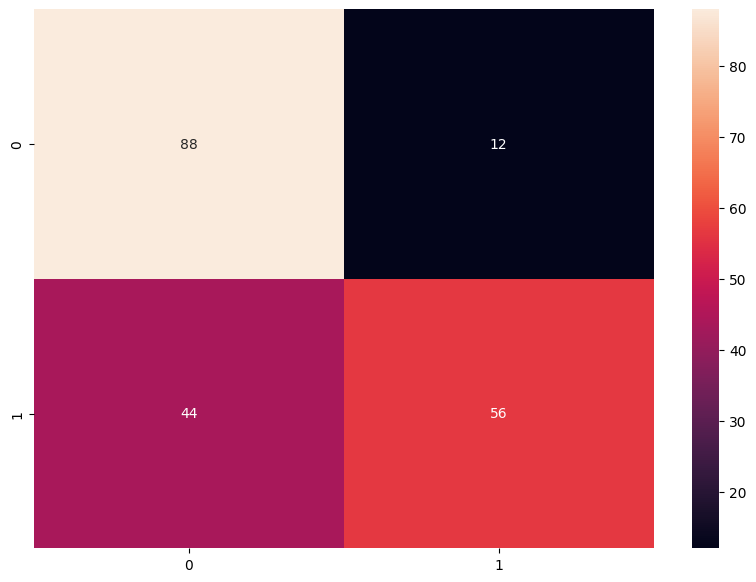

In [23]:
mlAlgorithms.model_generation_evaluation("Logistic")

----Iteration 1 In cross validation of SVM model----
selected parameters: {'C': 1000, 'kernel': 'linear'}
Recall: 0.5555555555555556
----Iteration 2 In cross validation of SVM model----
selected parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Recall: 0.59375
----Iteration 3 In cross validation of SVM model----
selected parameters: {'C': 1000, 'kernel': 'linear'}
Recall: 0.543859649122807
----Iteration 4 In cross validation of SVM model----
selected parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Recall: 0.6410256410256411
----Iteration 5 In cross validation of SVM model----
selected parameters: {'C': 25, 'kernel': 'linear'}
Recall: 0.5185185185185185
Average recall: 0.5705418728445044


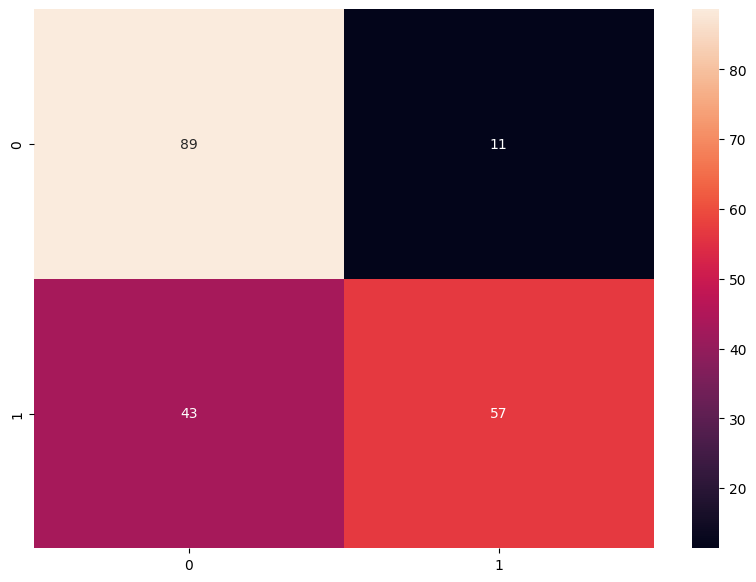

In [24]:
mlAlgorithms.model_generation_evaluation("SVM")

----Iteration 1 In cross validation of Tree model----
selected parameters: {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10}
Recall: 0.5740740740740741
----Iteration 2 In cross validation of Tree model----
selected parameters: {'max_depth': 110, 'min_samples_leaf': 4, 'min_samples_split': 2}
Recall: 0.453125
----Iteration 3 In cross validation of Tree model----
selected parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
Recall: 0.5263157894736842
----Iteration 4 In cross validation of Tree model----
selected parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Recall: 0.7435897435897436
----Iteration 5 In cross validation of Tree model----
selected parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Recall: 0.5555555555555556
Average recall: 0.5705320325386115


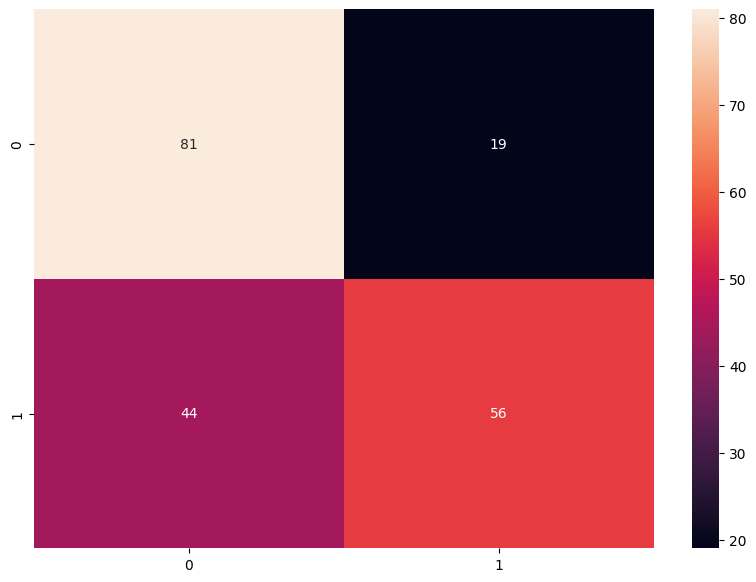

In [35]:
mlAlgorithms.model_generation_evaluation("Tree")

<h2>Evaluation with the highly correlated set of attributes</h2>

In [36]:
x2 = data.drop(columns = ["Outcome"])[["Glucose","BMI","Age","Pregnancies"]].values
y2 = data["Outcome"].values
kf2 = KFold(n_splits=5)
mlAlgorithms2 = MlTraining(x2,y2,kf2)

----Iteration 1 In cross validation of Logistic model----
selected parameters: {'C': 100}
Recall: 0.5555555555555556
----Iteration 2 In cross validation of Logistic model----
selected parameters: {'C': 10}
Recall: 0.484375
----Iteration 3 In cross validation of Logistic model----
selected parameters: {'C': 100}
Recall: 0.5614035087719298
----Iteration 4 In cross validation of Logistic model----
selected parameters: {'C': 100}
Recall: 0.6153846153846154
----Iteration 5 In cross validation of Logistic model----
selected parameters: {'C': 100}
Recall: 0.5740740740740741
Average recall: 0.558158550757235


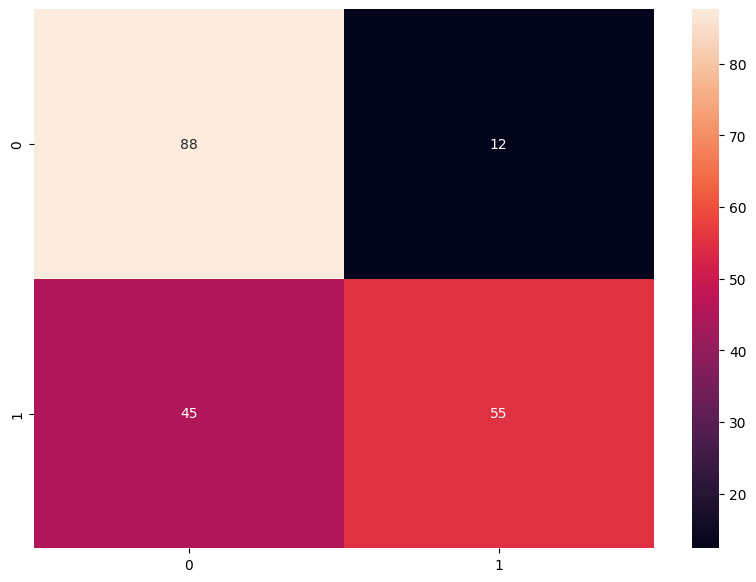

In [27]:
mlAlgorithms2.model_generation_evaluation("Logistic")

----Iteration 1 In cross validation of SVM model----
selected parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid'}
Recall: 0.5
----Iteration 2 In cross validation of SVM model----
selected parameters: {'C': 25, 'kernel': 'linear'}
Recall: 0.484375
----Iteration 3 In cross validation of SVM model----
selected parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Recall: 0.5614035087719298
----Iteration 4 In cross validation of SVM model----
selected parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Recall: 0.5897435897435898
----Iteration 5 In cross validation of SVM model----
selected parameters: {'C': 1000, 'kernel': 'linear'}
Recall: 0.5555555555555556
Average recall: 0.5382155308142151


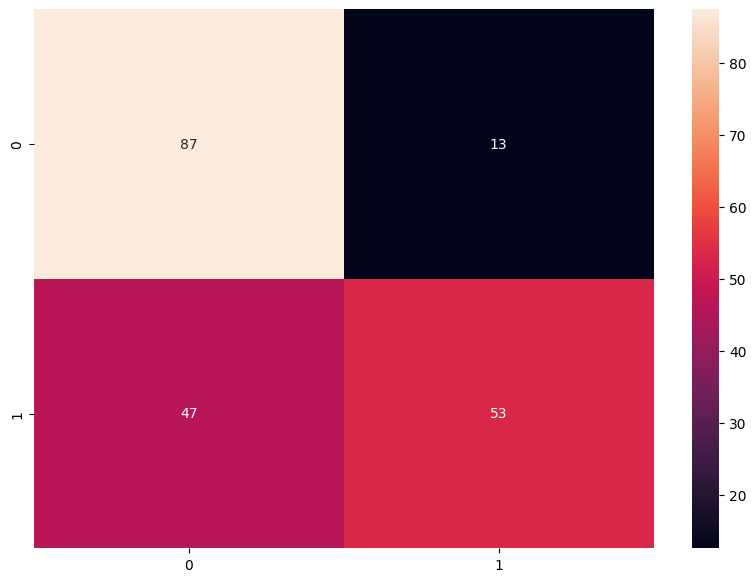

In [28]:
mlAlgorithms2.model_generation_evaluation("SVM")

----Iteration 1 In cross validation of Tree model----
selected parameters: {'max_depth': 110, 'min_samples_leaf': 1, 'min_samples_split': 2}
Recall: 0.5740740740740741
----Iteration 2 In cross validation of Tree model----
selected parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Recall: 0.53125
----Iteration 3 In cross validation of Tree model----
selected parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Recall: 0.43859649122807015
----Iteration 4 In cross validation of Tree model----
selected parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Recall: 0.6666666666666666
----Iteration 5 In cross validation of Tree model----
selected parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Recall: 0.5370370370370371
Average recall: 0.5495248538011696


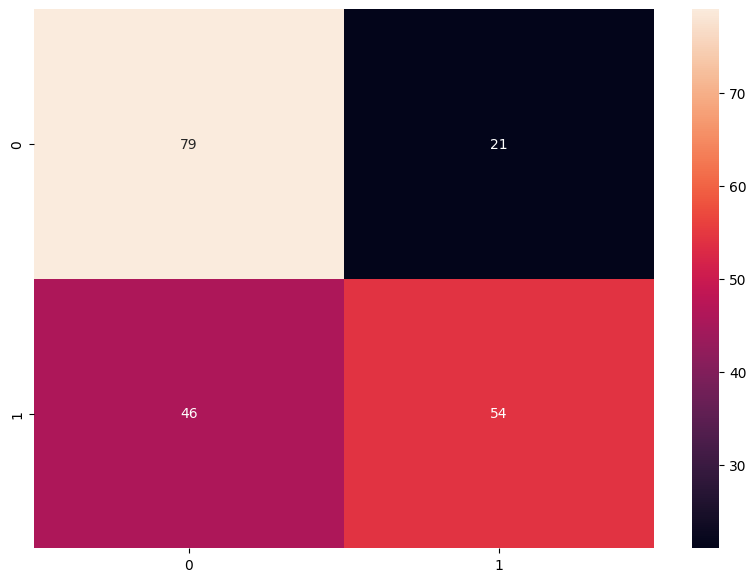

In [37]:
mlAlgorithms2.model_generation_evaluation("Tree")

<h2>Conclusions: </h2>
<ol>
<li>All three models achieved similar performance, the SVM model using all attributes achieved the highest recall value with 57% in the positive class and 89% in the negative class. To verify if this model is really better than the others we have to perform hypothesis tests. The value of 57% in the recall of the positive class is low, therefore more work is required on this problem.
<li>the performance of tree models decreases by about a 3% when training only with the highly correlated attributes.
<li>The performance of SVM models decreases by about a 4% when training only with the highly correlateed attributes.
<li>In the logistic regression model, the same result is obtained using all attributes and the highly correlated attributes.
</ol>

